In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [4]:
df_cont = pd.read_csv('continuous_kc_mk1')

In [5]:
df_cont.head()

,Unnamed: 0,price,sqft_living,sqft_lot,sqft_above,sqft_basement,sqft_living15,sqft_lot15
0,0,221900.0,1180,5650,1180,0.0,1340,5650
1,1,538000.0,2570,7242,2170,400.0,1690,7639
2,2,180000.0,770,10000,770,0.0,2720,8062
3,3,604000.0,1960,5000,1050,910.0,1360,5000
4,4,510000.0,1680,8080,1680,0.0,1800,7503


In [10]:
target = df_cont.price
df_cont.drop(['Unnamed: 0', 'price'], axis=1, inplace=True)

In [11]:
df_cont.head()

,sqft_living,sqft_lot,sqft_above,sqft_basement,sqft_living15,sqft_lot15
0,1180,5650,1180,0.0,1340,5650
1,2570,7242,2170,400.0,1690,7639
2,770,10000,770,0.0,2720,8062
3,1960,5000,1050,910.0,1360,5000
4,1680,8080,1680,0.0,1800,7503


In [12]:
target.head()

0    221900.0
1    538000.0
2    180000.0
3    604000.0
4    510000.0
Name: price, dtype: float64

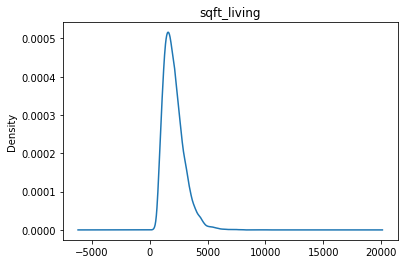

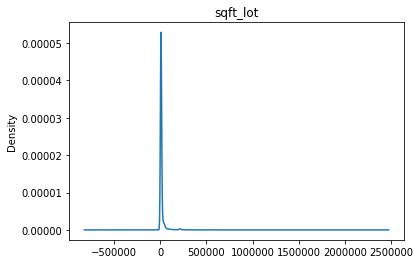

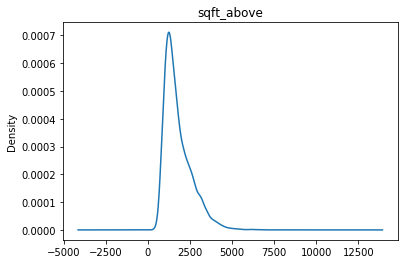

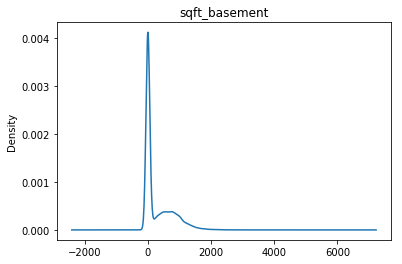

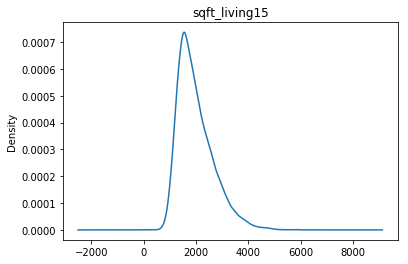

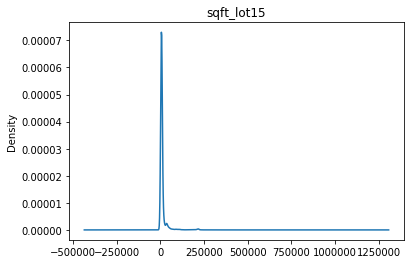

In [13]:
for col in df_cont:
    df_cont[col].plot.kde()
    plt.title(col)
    plt.show()

In [15]:
target = np.log(target)

In [16]:
df_cont.sqft_basement = df_cont.sqft_basement + 0.01

In [17]:
df_cont = df_cont.applymap(np.log)

In [18]:
df_cont.head()

,sqft_living,sqft_lot,sqft_above,sqft_basement,sqft_living15,sqft_lot15
0,7.073270,8.639411,7.073270,-4.605170,7.200425,8.639411
1,7.851661,8.887653,7.682482,5.991490,7.432484,8.941022
2,6.646391,9.210340,6.646391,-4.605170,7.908387,8.994917
3,7.580700,8.517193,6.956545,6.813456,7.215240,8.517193
4,7.426549,8.997147,7.426549,-4.605170,7.495542,8.923058


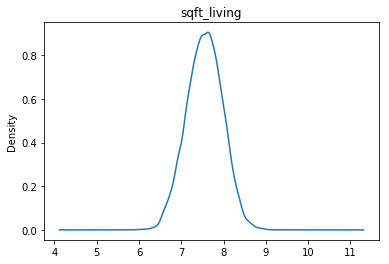

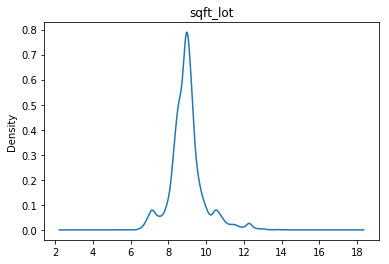

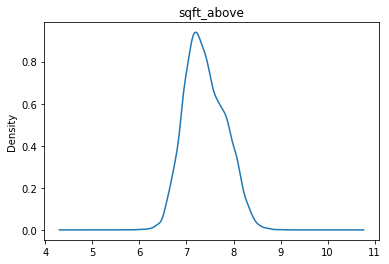

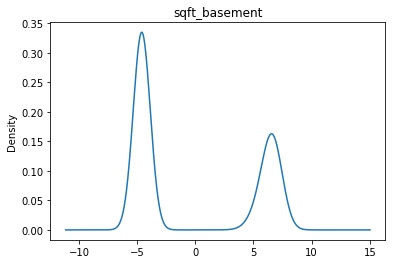

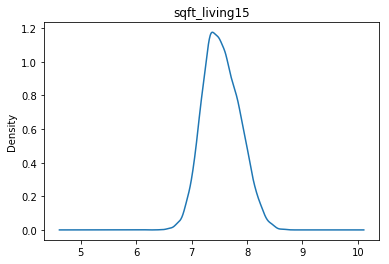

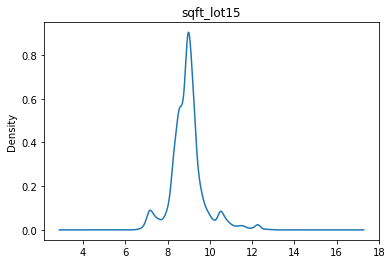

In [19]:
for col in df_cont:
    df_cont[col].plot.kde()
    plt.title(col)
    plt.show()

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()

In [21]:
X = df_cont
y = target

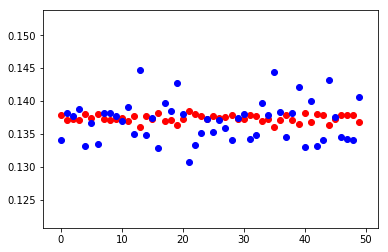

In [24]:
train_err = []
test_err =[]

n = 50
test_size = 0.15
for i in range(n):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)
    linreg.fit(X_train, y_train)
    y_hat_train = linreg.predict(X_train)
    y_hat_test = linreg.predict(X_test)
    train_err.append(mean_squared_error(y_train, y_hat_train))
    test_err.append(mean_squared_error(y_test, y_hat_test))
plt.scatter(list(range(n)), train_err, label = 'Err when TRAINING', c='red')
plt.scatter(list(range(n)), test_err, label = 'Err when TESTING', c='blue')
plt.show()

In [26]:
sum(train_err)

6.86911888610814

In [27]:
sum(test_err)

6.848769668394426